<a href="https://colab.research.google.com/github/Muzhi1920/take-home_challenge/blob/main/01_EDA_advance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced-EDA

翻译自：https://medium.com/epfl-extension-school/advanced-exploratory-data-analysis-eda-with-python-536fa83c578a

## 0. 快速有效获取格式化数据集
一个较好的EDA方式会帮助你方便的处理、理解数据的联系，但是这种相对较好的数据集并不容易获取。实际的所有数据分析过程中，全面理解数据是获得好的数据分析报告的关键，更多的需要花费时间放在合理的EDA方式上。

## 一、 研究数据结构、质量和内容

整体来看，EDA过程存在反复性，通常某个步骤是在每次分析中都会用到，这是很正常的，也方便我们提炼出pipeline的优势。

1. **数据结构**：数据维度、特种类型
2. **数据质量**：重复、缺失或无关实例
3. **数据内容**：更深的去研究和对比不同数据特征之间的关系，试图发现新的东西！

更优雅的获取数据集得方式： [road safety dataset](https://www.openml.org/d/42803) from [OpenML](https://www.openml.org/search?type=data).

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

# 按照data id获取数据，并转换为dataframe格式
dataset = fetch_openml(data_id=42803, as_frame=True)

# 先只check特征frame
df_X = dataset["frame"]
df_X.sample(5)

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
27859,201501PL61017,2.0,1.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
252881,201543W228045,2.0,1.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0,...,5.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
325681,2015551501386,1.0,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
350722,2015950003980,2.0,21.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,98.0,1.0,NaN
236599,201542I299509,1.0,9.0,0.0,16.0,0.0,0.0,1.0,0.0,7.0,...,7.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,10.0


### 1.check数据结构

In [ ]:
# 处理数据前，先整体窥探一下数据结构，主要聚焦于columns，维度等。
df_X.shape

(363243, 67)

In [ ]:
# 各feature column的数据类型呈现
pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

#### 1.1. 非数值型数据
更加聚焦于非数值型特征，因为他们占据更多的特征预处理的复杂成本

In [ ]:
df_X.select_dtypes(exclude="number").head()

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,1.0,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,1.0,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,1.0,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,1.0,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,1.0,09/01/2015,07:30,E09000020,E01002814


但还是存在一些typo的特征类型存在

In [ ]:
# change data type
df_X["Sex_of_Driver"] = df_X["Sex_of_Driver"].astype("float")

对于非数值类型的feature column，很有必要使用`.describe()` 研究特征值的缺失情况、频次及分布。基于这种简单且直观的分布统计，可以令你对数据产生基本认识，甚至可以直接得出部分结论。

In [ ]:
df_X.describe(exclude="number")

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,319866,319822,319866,298758
unique,140056,365,1439,204,25979
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2972,8457,1456


#### 1.2. 数值型数据
对于数值型数据，统计去重值的分布。这在二值类型、多值类型（离散），和连续值类型（稠密）上具有不同的意义。

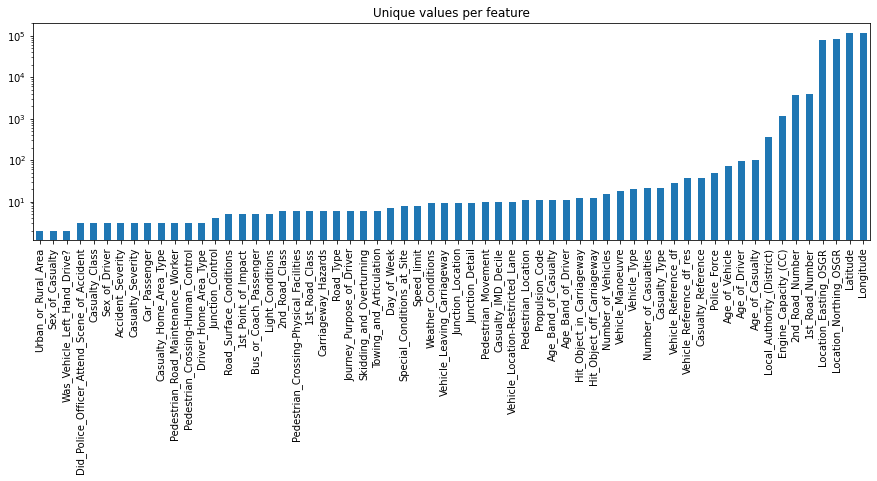

In [ ]:
# 所有数值型的feature column，统计特征值数，且排序，越连续值越高。
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

#### 1.3. 数据类型-结论

基于简单的数据类型的研究，可以对数据集得到基本的认识。包含什么数据类型？不同特征有多少可选值？特征值是离散还是稠密？ `df_X.info()` or `df_X.describe()`。

### 2.check数据质量

分析数据质量，对数据的缺失、重复、噪音等样本有个全局认识。

#### 2.1. 重复检测

分析样本重复记录的情况。但是选择**忽略**哪种feature很重要，比如像index，sample_id等“主键”，这样的字段无意义。**更应该聚焦于实际重要的核心feature**。

In [ ]:
# ignoring the index feature
n_duplicates = df_X.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 22 duplicates in your database.


丢掉`.drop_duplicates()`.

In [ ]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_X.drop(labels=["Accident_Index"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape

(363221, 67)

#### 2.2 缺失值检测
重心放在真正有效的数据上。

##### 2.2.1 样本维度
样本-特征图，查看miss hole

`df_X.isna()`

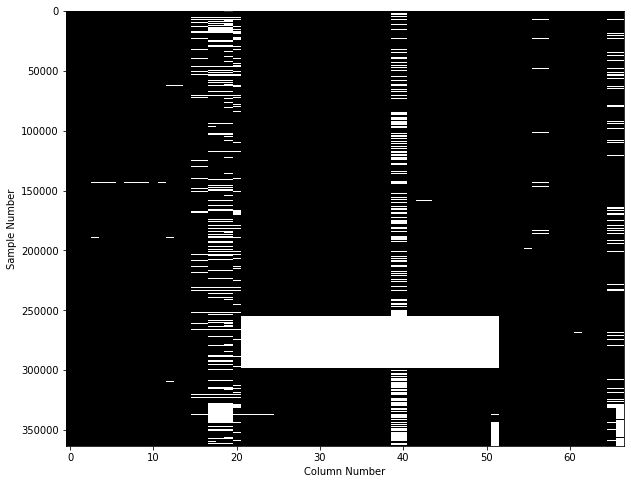

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

y轴为样本id，x轴为特征num，白色为样本对应的feature为缺失。另miss check库：[missingno](https://github.com/ResidentMario/missingno) 

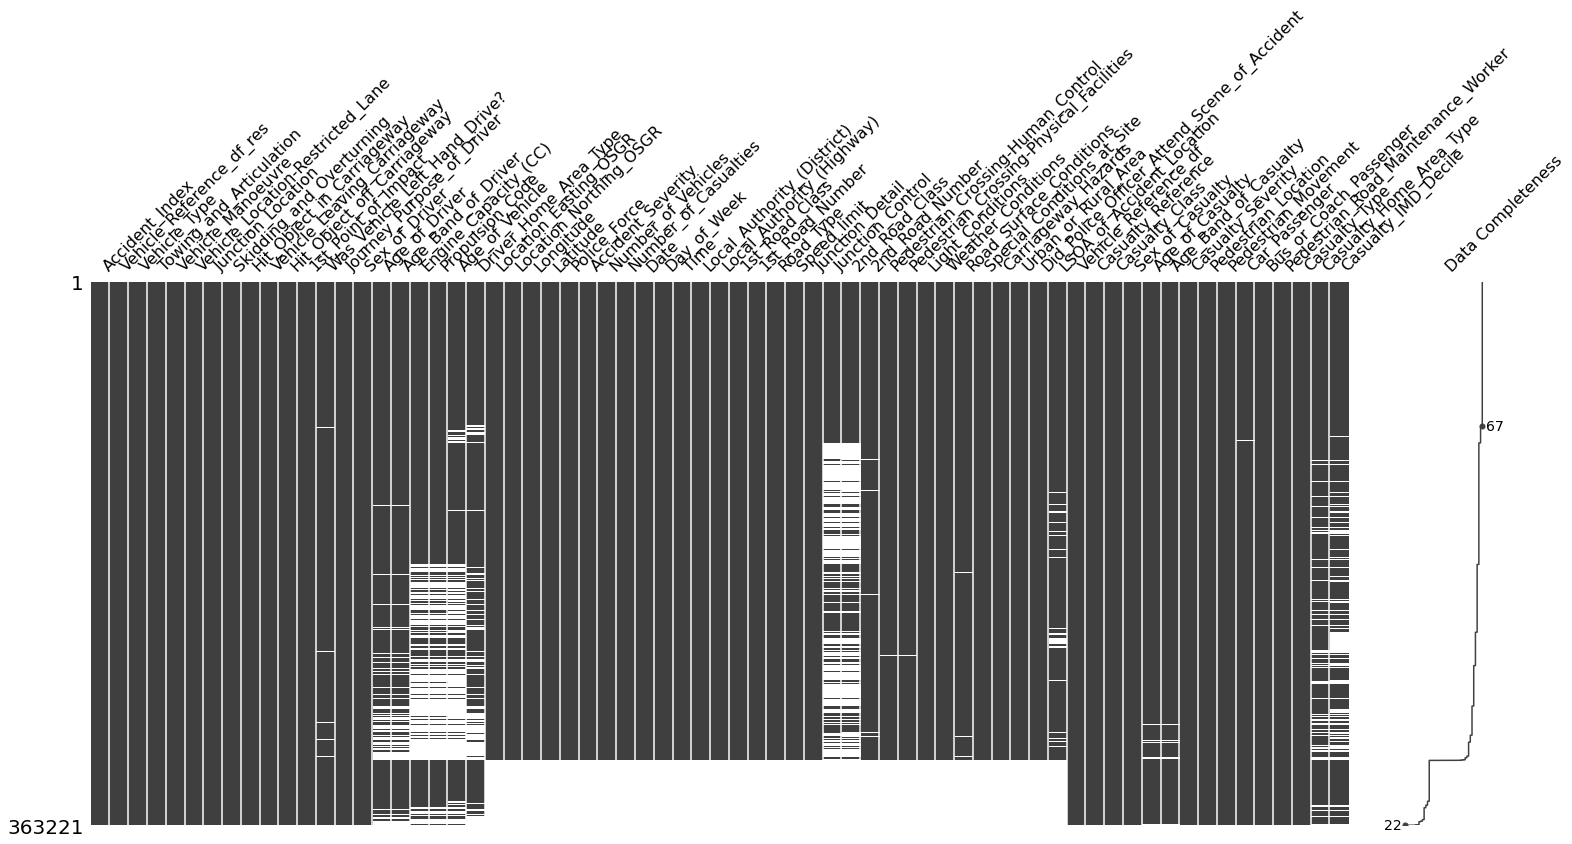

In [ ]:
import missingno as msno
msno.matrix(df_X, labels=True, sort="descending");

- 几乎一半以上的sample均有缺失hole
- or 替换填充？

对于缺失较多的样本，建议drop；依据'Data Completeness' column。发现最小的22个feature，最多的67个feature（无missing）。因此这给你一个较好的建议去做基于缺失值的样本过滤。


In [ ]:
# thresh阈值是，对每行样本，保留data completness 80%以上的样本。
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape

(319790, 60)

与上图相比，这里的图示按照data completeness进行样本排序。

##### 2.2.2 特征维度

从特征维度，查看缺失值分布。能看到基本同上图分布`2nd_Road_Class`特征的缺失比最大。

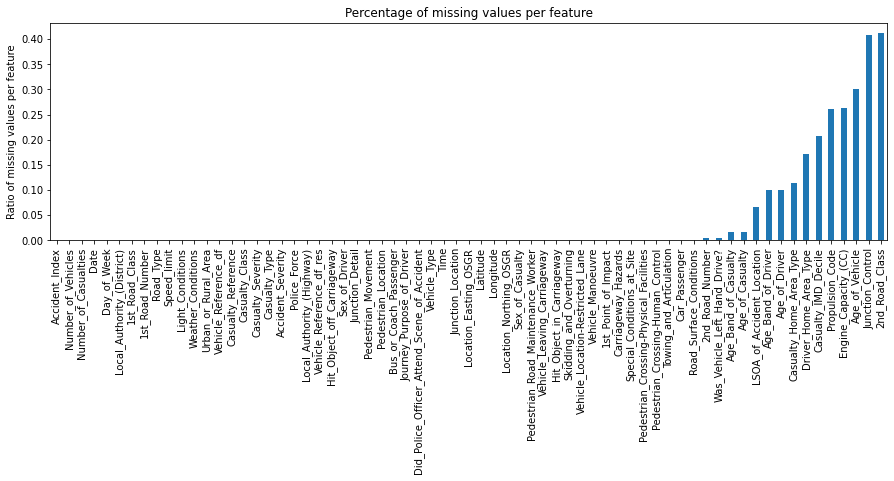

In [ ]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

`2nd_Road_Class`, `Junction_Control`, `Age_of_Vehicle` 缺失值占比最高，后面按照 15% 比例进行缺失丢弃。

In [ ]:
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1) #保留85%，同上保留80%
df_X.shape

(319790, 60)

对于缺失值的处理：特征维度  >  样本维度。以上只是缺失值的X、Y向的过滤，还不包括填充。

#### 2.3. 样本误差、和噪音

区分正常样本（不该存在）和异常点（影响特征分布）。或者说特征的重要性等等方面。

下面以全局数据的角度，宏观甄别出不寻常的样本或特征。

### 2.3.1. Numerical features
`.plot()` 

- `lw=0`: `lw` stands for line width. `0` means that we don't want to show any lines
- `marker="."`: Instead of lines, we tell the plot to use `.` as markers for each data point
- `subplots=True`: `subplots` tells `pandas` to plot each feature in a separate subplot
- `layout=(-1, 4)`: This parameter tells `pandas` how many rows and columns to use for the subplots. The `-1` means "as many as needed", while the `2` means to use 2 columns per row.
- `figsize=(15, 30), markersize=1`: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the `markersize` accordingly.

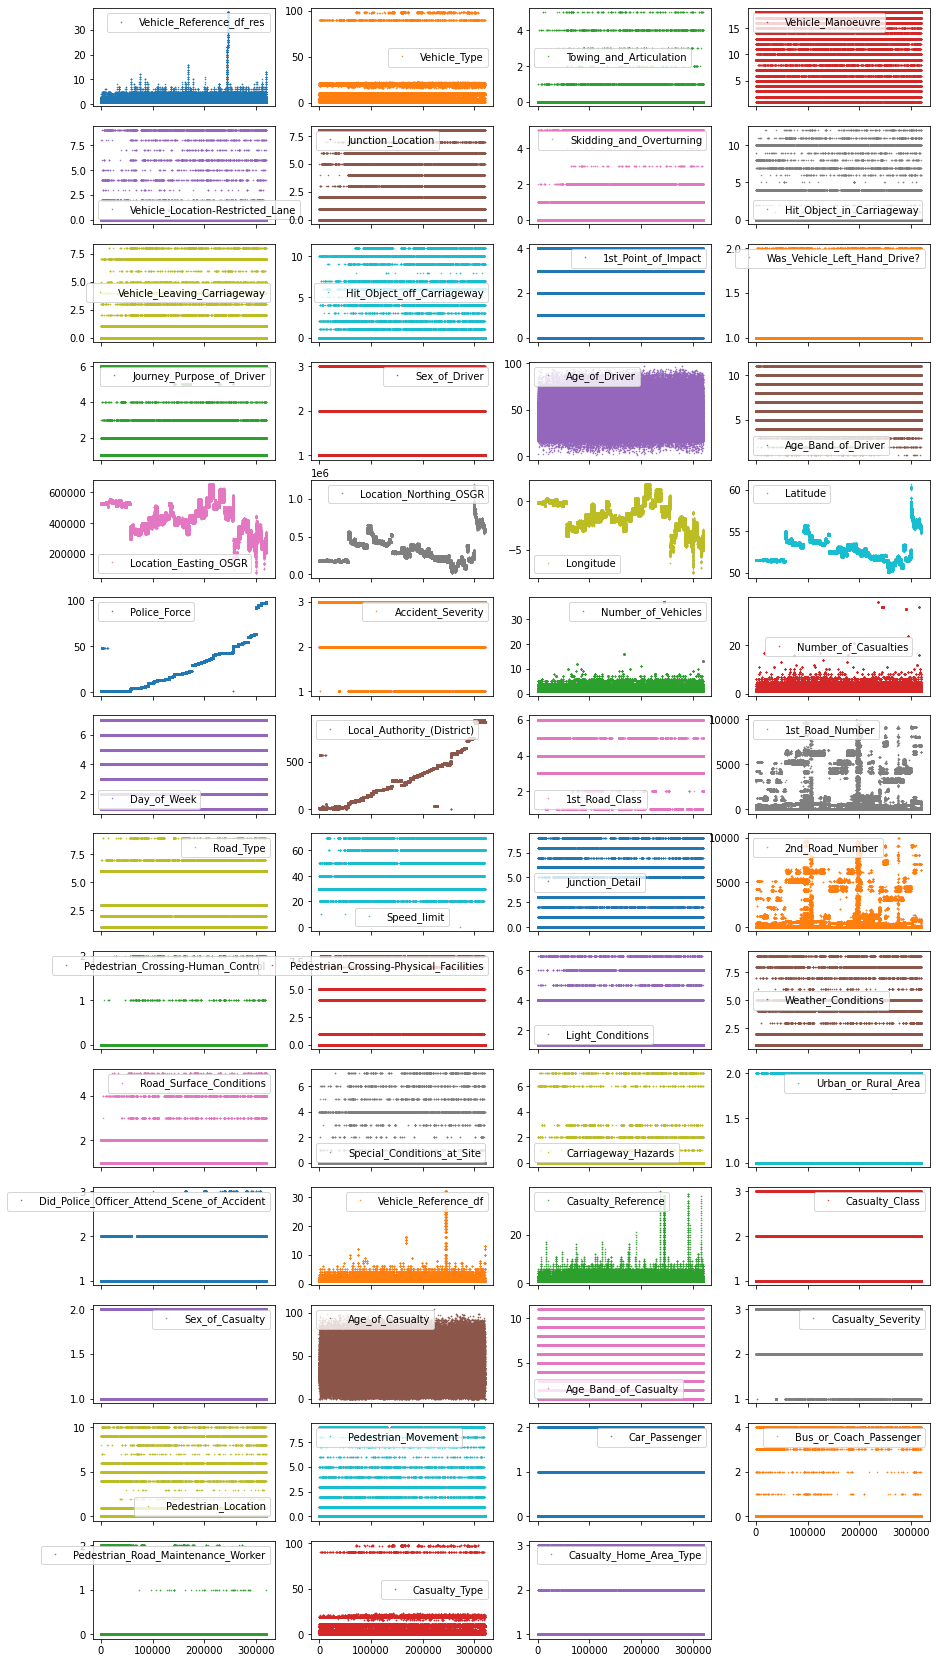

In [ ]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

- 每个图，代表一个特征的分布；
- 每个图中的每个点，代表该特征下，该样本的取值；能发现，有二值分布，有多值分布，也有稠密的区间连续值（如Y轴所示）；

以上，为后续的数据清洗，和EDA过程。

##### 2.3.2 非数值型特征

基于非数值特征区分噪音和错误样本比较棘手，一般来说仅能查看各稀疏特征的频次和分布。

In [33]:
# 按照特征的数值类型，展开统计
df_X.describe(exclude=["number", "datetime"])

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,319790,319790,319746,319790,298693
unique,123645,365,1439,204,25977
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2969,8457,1456


这种类别稀疏特征，最好是分析每个特征值出现的频次，或者有序分析，反而能更直观的得到些结论。

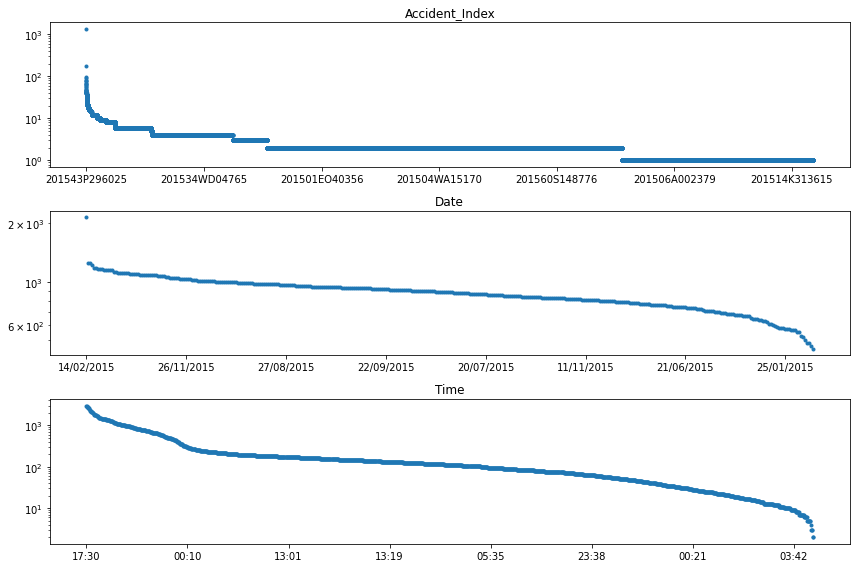

In [34]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])

# Loop and plot
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    # per unique value, feature value, counts
    df_non_numerical[col].value_counts().plot(
        logy=True, title=col, lw=0, marker=".", ax=ax)
plt.tight_layout();

- 图1. 100多人陷入该事故；
- 图2. 在2015.2.14事故频发；

删除10条最频繁的事故。

In [35]:
# 得到top10频繁的事故index
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index

# 删除该类型事故
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape

(317665, 60)

## 2.4. 数据质量研究结论
通过第二部分，应该更好的理解数据的总体质量，包括从样本重复、缺失值和异常样本三个角度。

# 3.数据内容分析

分析数据内容，依次按照特征分析是高效的，但是特征数一上来便很笨重。

三种分析数据的方式来研究数据的实际内容，以便快速的了解每个特征包含的内容以及他们的相关性。

## 3.1特征分布

观察特征分布，帮助你更好的理解数据内容。 此外更能辅助你的EDA过程，对于数据清洗和特征转换提供一些有用的信息。

多值数值类型`.plot`

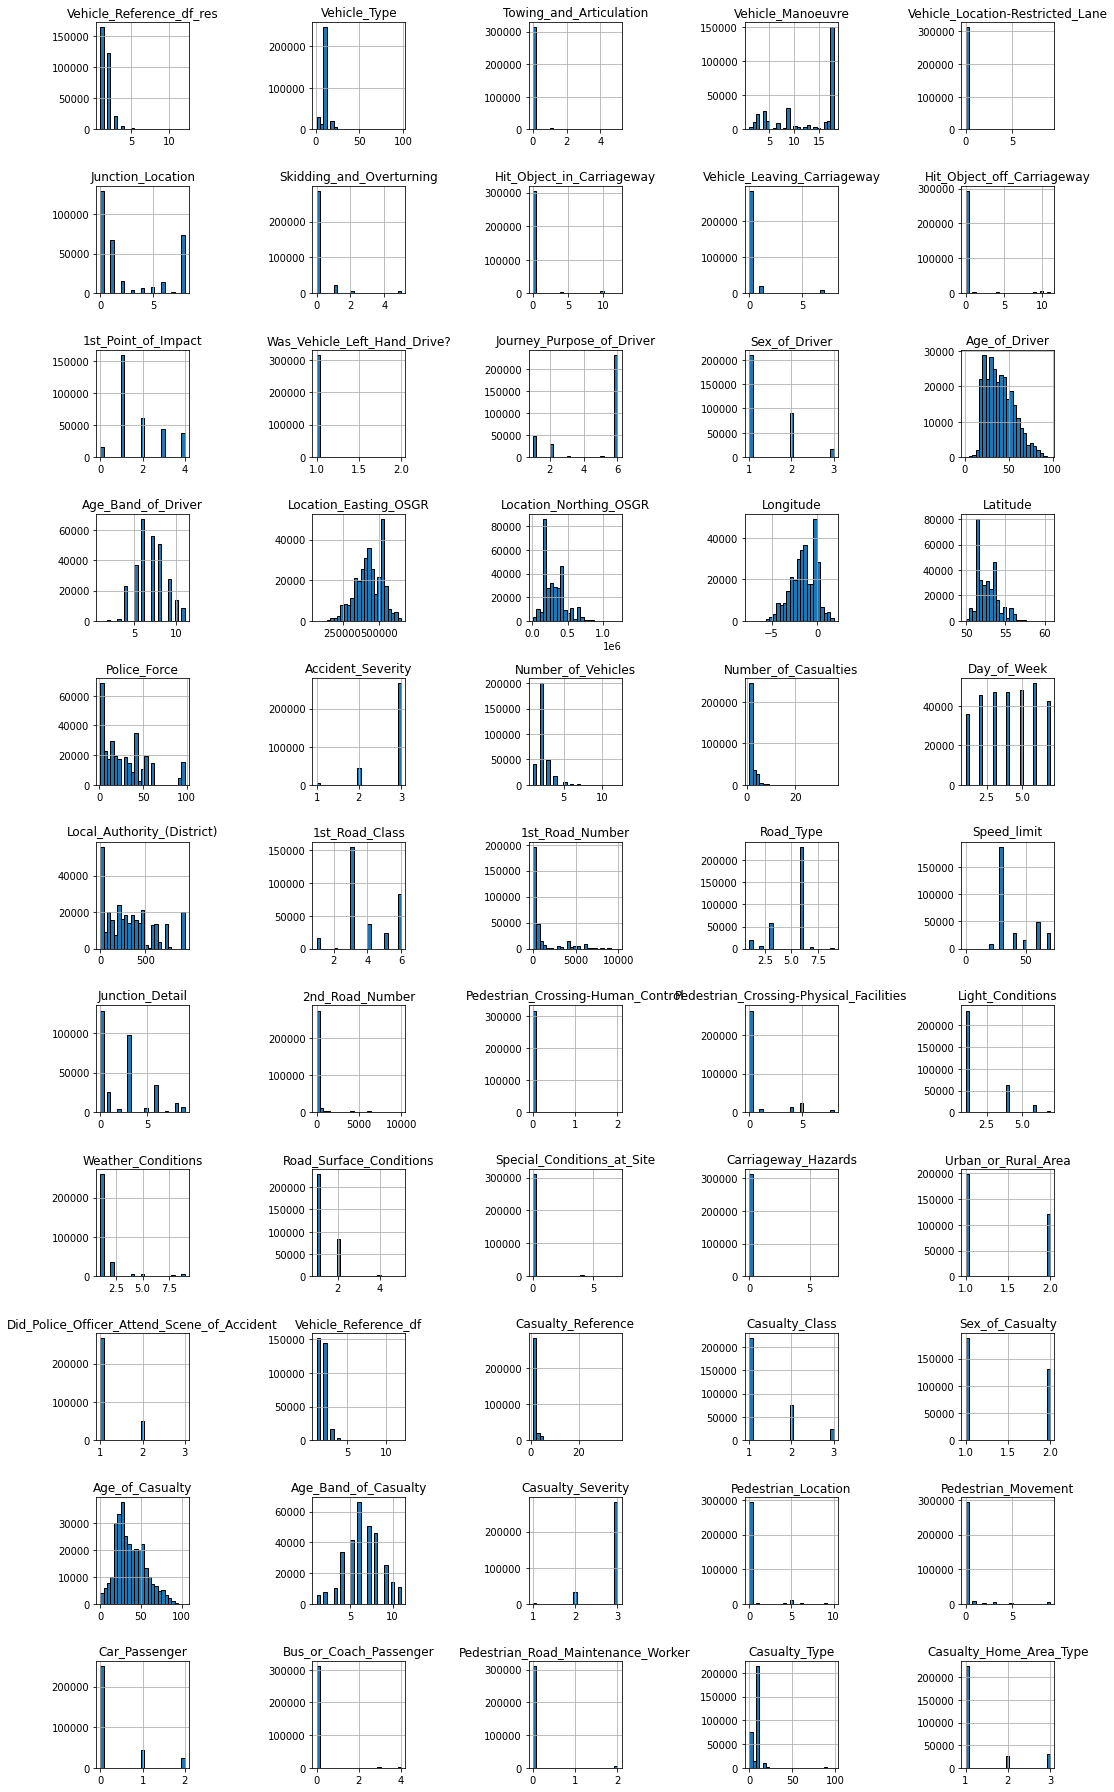

In [36]:
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

特征值频次和分布。

像`Towing_and_Articulation` or `Was_Vehicle_Left_Hand_Drive?`只是单类特征（特征重要性低）。 进一步的，从特征维度选择出样本中最高频的特征值。

Pedestrian_Crossing-Human_Control    0.995259
Was_Vehicle_Left_Hand_Drive?         0.990137
Carriageway_Hazards                  0.983646
Towing_and_Articulation              0.983221
Vehicle_Location-Restricted_Lane     0.982088
dtype: float64

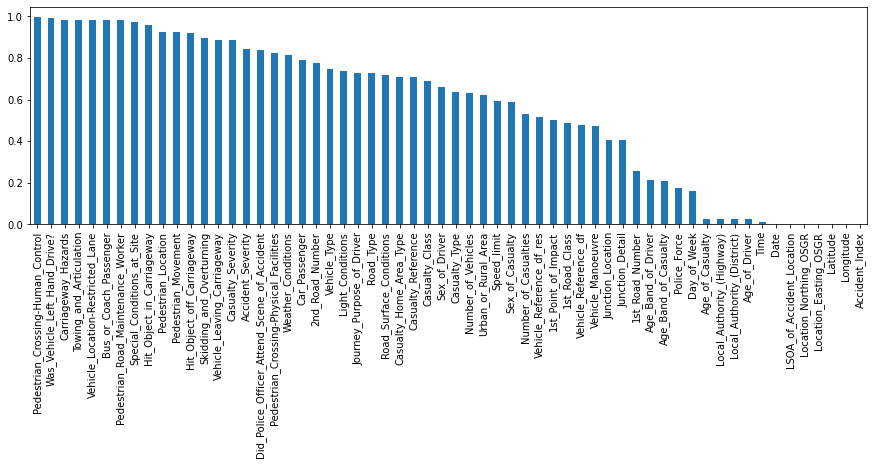

In [37]:
# 高频特征值
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

数据偏态分布（left、right）

确定数值特征是非高斯分布.数值变换为正态分布，平滑数据`log`

## 3.2. 特征模式（or how should i say?）


1. 是否可以根据某个特征确定某种范式辅助删除一些数据？
2. 是否能区分特征间某种特定的关系，以更好的理解数据？

解决两问题前，先随机选取几个特征看一下：

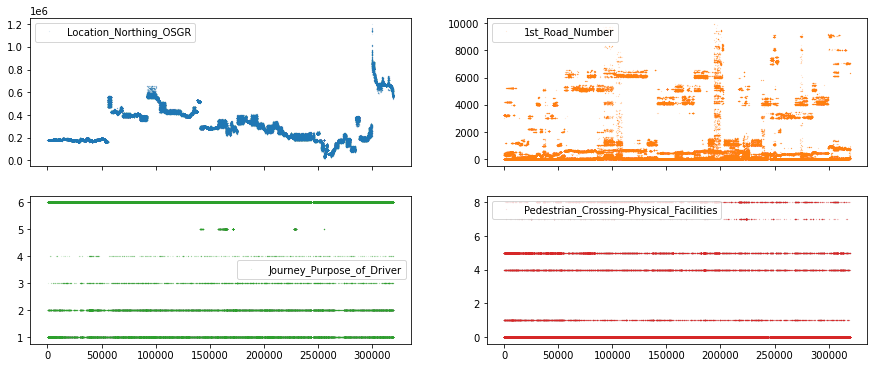

In [38]:
df_X[["Location_Northing_OSGR", "1st_Road_Number",
      "Journey_Purpose_of_Driver", "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1, figsize=(15, 6));

虽然有很多特定的模式来探索特征, 但是可以通过少于25个特征值得特征来缩减选择。

In [39]:
# 超过25特征值的特征定为连续列
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25

### 3.2.1. 连续特征

如上定义连续特征，可视化如下：

In [43]:
# 连续特征列
df_continuous = df_X[cols_continuous[cols_continuous].index]
df_continuous.shape

(317665, 11)

直接`pairplot`，或`df_continuous.iloc[:, :5]`，视特征而定

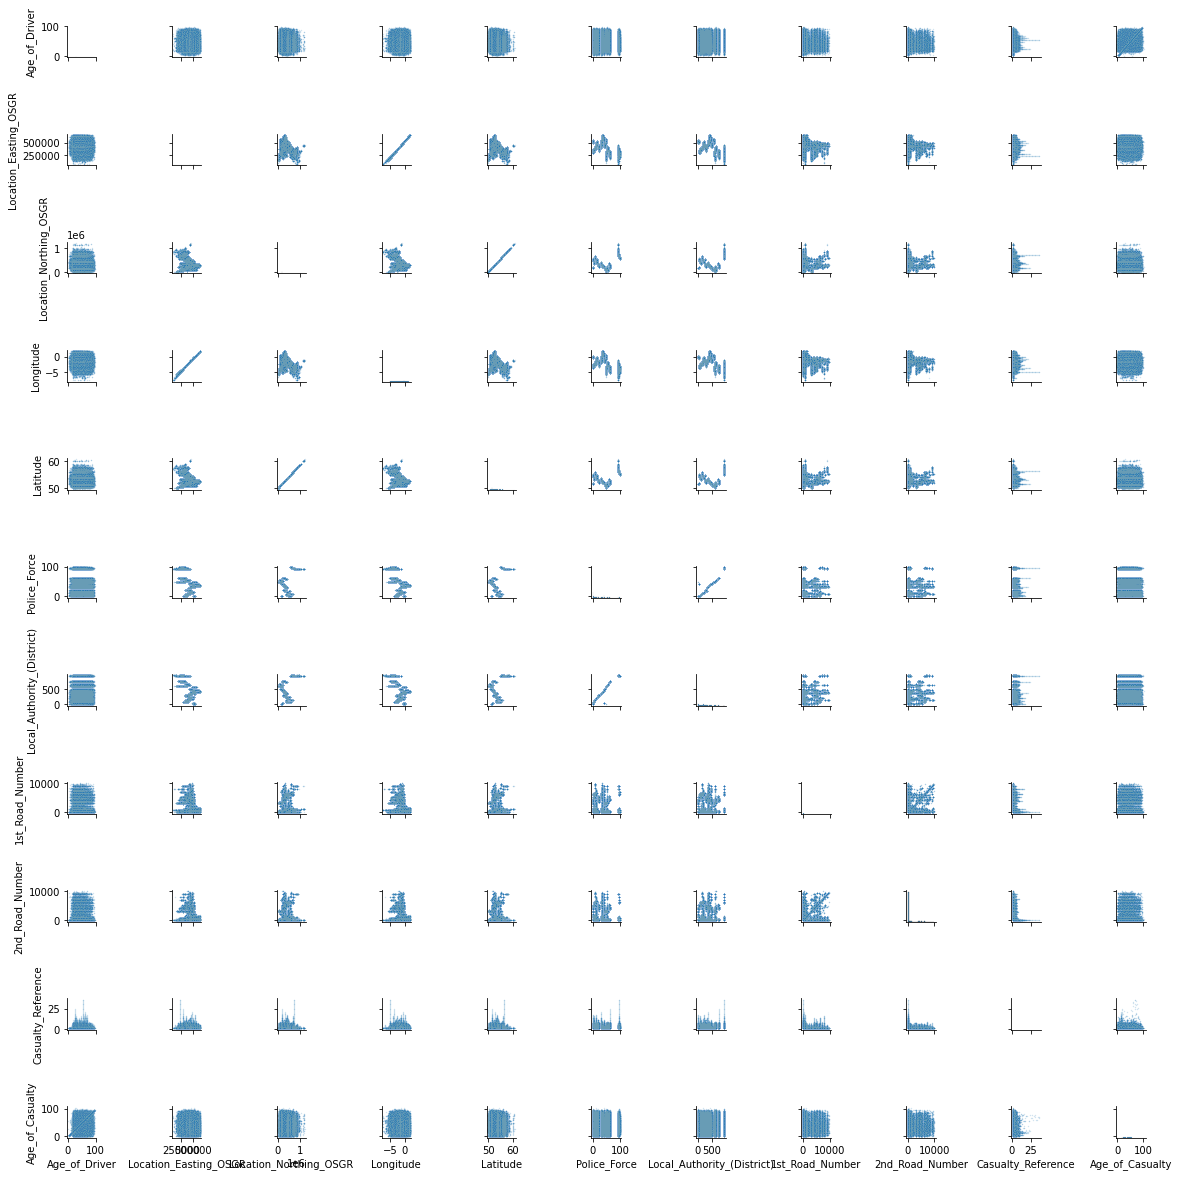

In [42]:
import seaborn as sns

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

`Location_Easting_OSGR` and `Longitude`，`Location_Easting_OSGR` and `Latitude`强线性关系

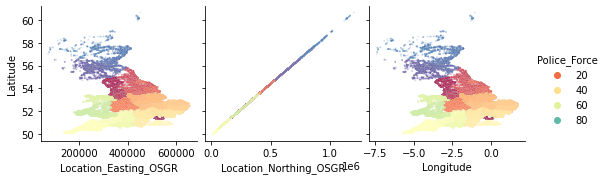

In [44]:
sns.pairplot(
    df_X, plot_kws={"s": 3, "alpha": 0.2}, hue="Police_Force", palette="Spectral",
    x_vars=["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude"],
    y_vars="Latitude");

### 3.2.2.离散顺序特征

In [49]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df_X[cols_continuous[~cols_continuous].index]
df_discrete.shape

(317665, 44)

As always, there are multiple way for how we could investigate all of these features. Let's try one example, using seaborn's `stripplot()` together with a handy `zip()` for-loop for subplots.

**Note**, to spread the values out in the direction of the y-axis we need to chose one particular (hopefully informative) feature. While the 'right' feature can help to identify some interesting patterns, usually any continuous feature should do the trick. The main interest in this kind of plot is to see how many samples each discrete value contains.

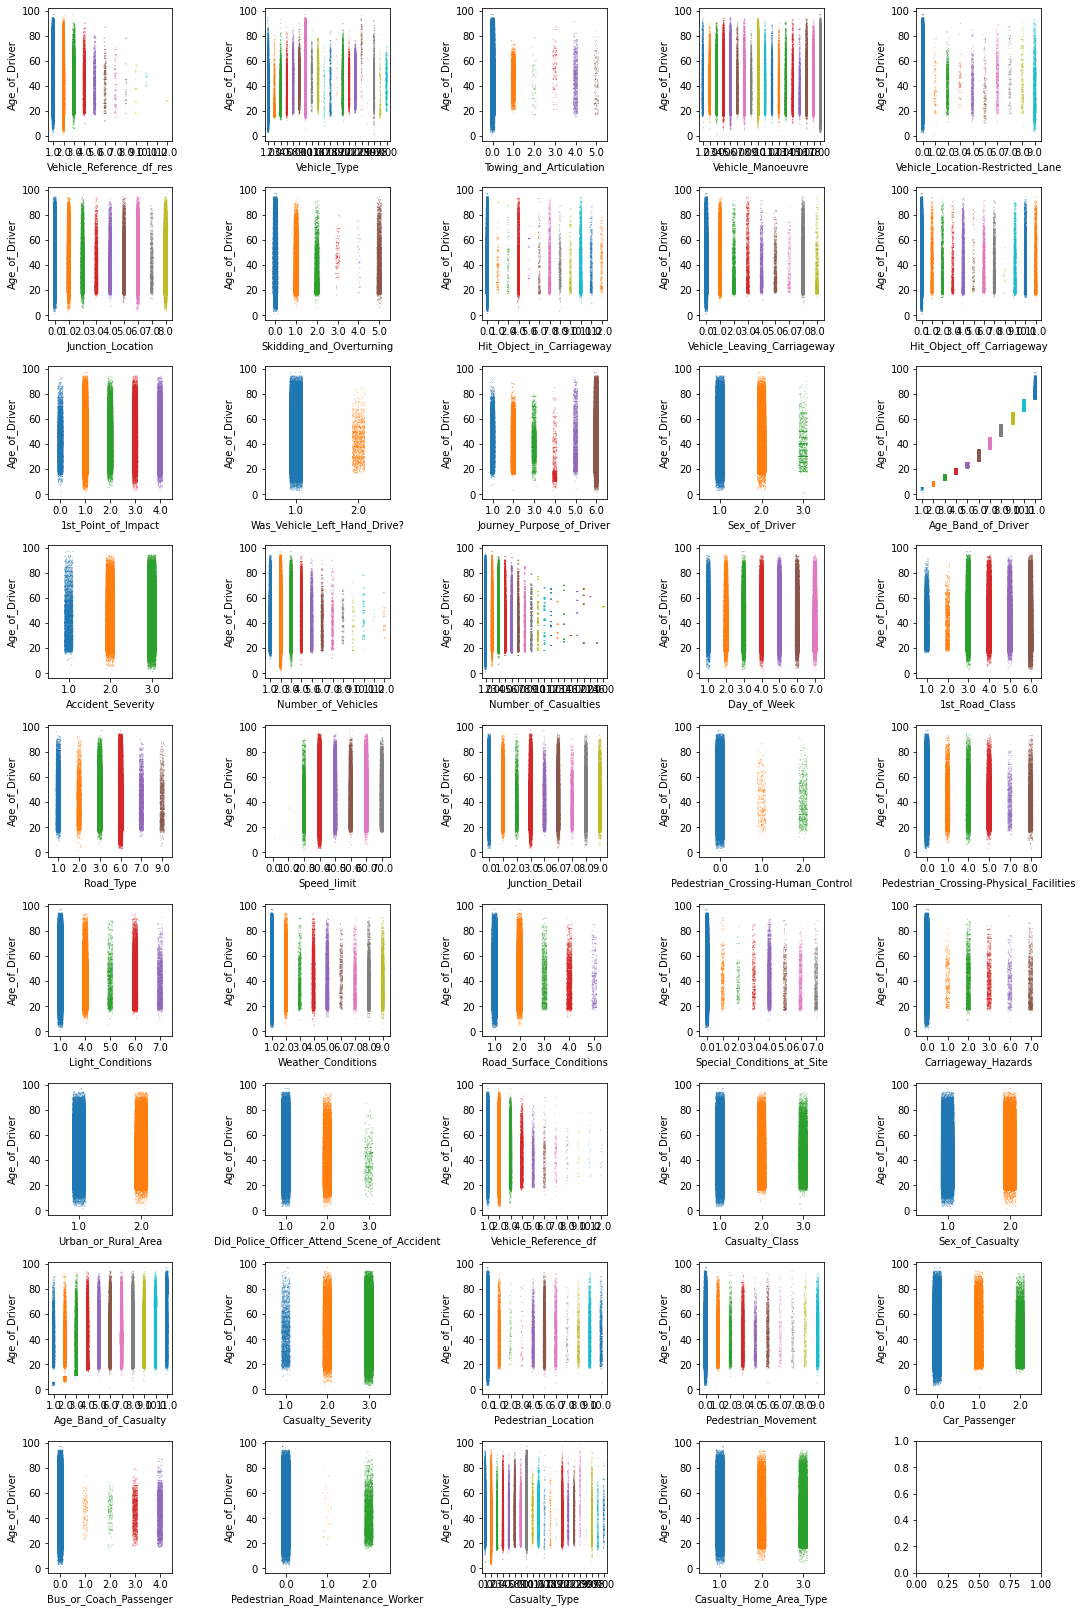

In [46]:
import numpy as np

# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df_X["Age_of_Driver"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout();

There are too many things to comment here, so let's just focus on a few. In particular, let's focus on 6 features where the values appear in some particular pattern or where some categories seem to be much less frequent than others. And to shake things up a bit, let's now use the `Longitude` feature to stretch the values over the y-axis.

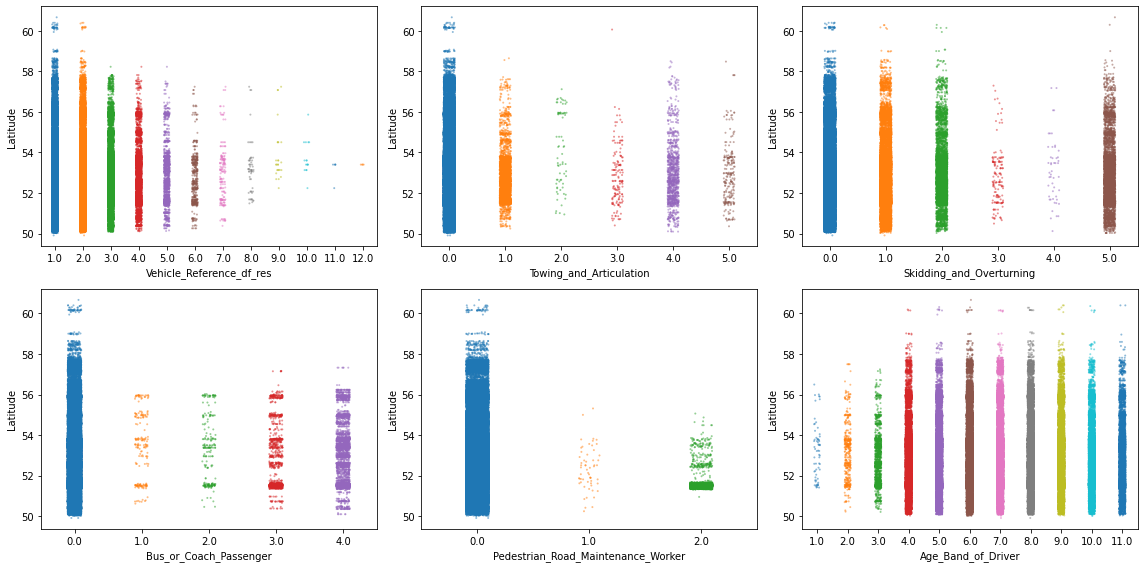

In [47]:
# Specify features of interest
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout();

These kind of plots are already very informative, but they obscure regions where there are a lot of data points at once. For example, there seems to be a high density of points in some of the plots at the 52nd latitude. So let's take a closer look with an appropriate plot, such as `violineplot` ( or `boxenplot` or `boxplot` for that matter). And to go a step further, let's also separate each visualization by `Urban_or_Rural_Area`.

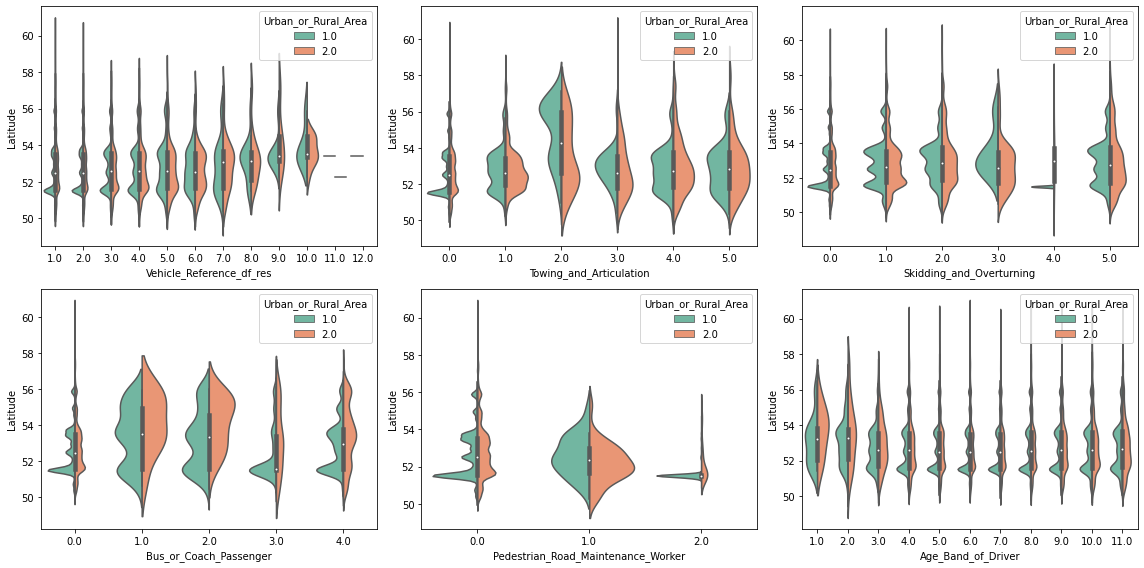

In [48]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df_X, x=col, y=df_X["Latitude"], palette="Set2",
                   split=True, hue="Urban_or_Rural_Area", ax=ax)
plt.tight_layout();

Interesting! We can see that some values on features are more frequent in urban, than in rural areas (and vice versa). Furthermore, as suspected, there seems to be a high density peak at latitude 51.5. This is very likely due to the more densely populated region around London (at 51.5074°).

## 3.3. Feature relationships

Last, but not least, let's take a look at relationships between features. More precisely how they correlate. The quickest way to do so is via pandas' `.corr()` function. So let's go ahead and compute the feature to feature correlation matrix for all numerical features.

In [ ]:
# Computes feature correlation
df_corr = df_X.corr(method="pearson")

**Note**: Depending on the dataset and the kind of features (e.g. ordinal or continuous features) you might want to use the `spearman` method instead of the `pearson` method to compute the correlation. Whereas the **Pearson** correlation evaluates the linear relationship between two continuous variables, the **Spearman** correlation evaluates the monotonic relationship based on the ranked values for each feature. And to help with the interpretation of this correlation matrix, let's use seaborn's `.heatmap()` to visualize it.

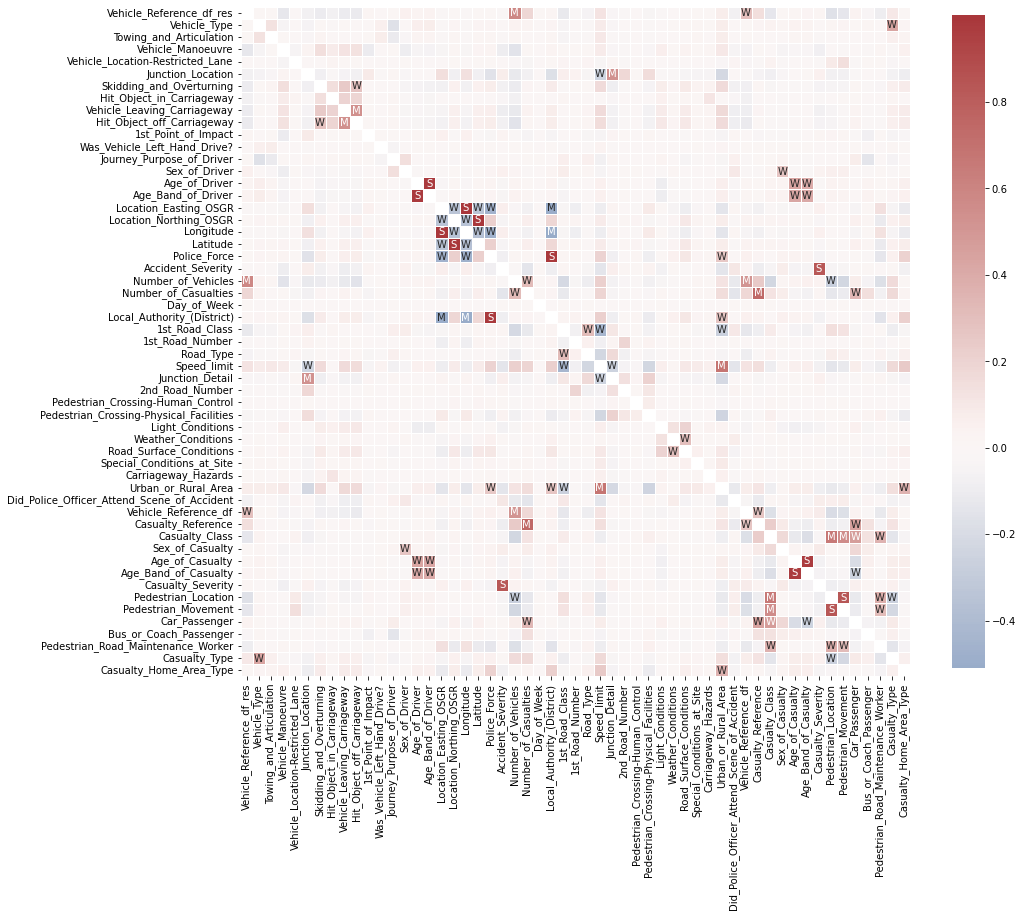

In [ ]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

This looks already very interesting. We can see a few very strong correlations between some of the features. Now, if you're interested actually ordering all of these different correlations, you could do something like this:

In [ ]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

Local_Authority_(District)  Longitude                -0.509343
                            Location_Easting_OSGR    -0.502919
Police_Force                Longitude                -0.471327
                            Location_Easting_OSGR    -0.461112
Speed_limit                 1st_Road_Class           -0.438931
                                                        ...   
Age_Band_of_Casualty        Age_of_Casualty           0.974397
Age_Band_of_Driver          Age_of_Driver             0.979019
Local_Authority_(District)  Police_Force              0.984819
Longitude                   Location_Easting_OSGR     0.999363
Latitude                    Location_Northing_OSGR    0.999974
Length: 1485, dtype: float64

As you can see, the investigation of feature correlations can be very informative. But looking at everything at once can sometimes be more confusing than helpful. So focusing only on one feature with something like `df_X.corrwith(df_X["Speed_limit"])` might be a better approach.

Furthermore, correlations can be deceptive if a feature still contains a lot of missing values or extreme outliers. Therefore, it is always important to first make sure that your feature matrix is properly prepared before investigating these correlations.

## 3.4. Conclusion of content investigation

At the end of this third investigation, we should have a better understanding of the content in our dataset. We looked at value distribution, feature patterns and feature correlations. However, these are certainly not all possible content investigation and data cleaning steps you could do. Additional steps would for example be outlier detection and removal, feature engineering and transformation, and more.

# Take home message

A proper and detailed EDA takes time! It is a very iterative process that often makes you go back to the start, after you addressed another flaw in the dataset. This is normal! It's the reason why we often say that 80% of any data science project is data preparation and EDA.

But keep also in mind that an in-depth EDA can consume a lot of time. And just because something seems interesting doesn't mean that you need to follow up on it. Always remind yourself what the dataset will be used for and tailor your investigations to support that goal. And sometimes it is also ok, to just do a quick-and-dirty data preparation and exploration. So that you can move on to the data modeling part rather quickly, and to establish a few preliminary baseline models perform some informative results investigation.